In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
file_dir = os.path.join(os.getcwd(), 'openpowerlifting-2020-02-15', 'openpowerlifting-2020-02-15.csv')
data = pd.read_csv(file_dir)

# list(data.columns)

In [3]:

#find max DL 
data['MaxDL'] = data[['Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',]].max(axis=1)

data.loc[data['MaxDL'] < 0,'MaxDL'] = np.nan

#set fed lists
iplList = ['IPL', 'USPA', 'AusPL', 'CPL', 'IrishPO', 'KuwaitPL', 'LMP', 'IPL-NZ', 'UPL', 
    'THSPA', 'THSWPA', 'PA', 'RPS', 'ADFPF', 'WDFPF']

ipfList = ['AfricanPF', 'AsianPF', 'FESUPO', 'NAPF', 'NordicPF',
    'OceaniaPF', 'ORPF', 'USAPL', 'BP', 'EPA', 'ScottishPL', 'WelshPA', 'FALPO', 
    'CPU', 'HPLS', 'CSST', 'DSF', 'SVNL', 'FFForce', 'BVDK', 'KRAFT', 'IrishPF', 'JPA',
    'KPF', 'LPF', 'FEMEPO', 'NPB', 'NZPF', 'NSF', 'PAP', 'PLZS', 
    'AEP', 'SSF', 'ThaiPF', 'UkrainePF', 'VPF']

data.loc[data['Federation'].isin(ipfList),'IPFFed'] = 'Yes'
data.loc[data['Federation'].isin(ipfList) == False,'IPFFed'] = 'No'

data.loc[data['Federation'].isin(iplList),'IPLFed'] = 'Yes'

data['DLBarType'] = ''

data.loc[(data['Federation'].isin(ipfList)) & (data['Equipment'] == 'Raw') & (data['Event'] == 'SBD') & (data['Sex'] == 'M'),'DLBarType'] = 'Stiff'
data.loc[(data['Federation'].isin(ipfList) == False) & (data['Equipment'] == 'Raw') & (data['Event'] == 'SBD') & (data['Sex'] == 'M') & (data['Tested'] == 'Yes'),'DLBarType'] = 'Deadlift'



In [4]:
# check leftover feds. ie. not IPL/IPF
pd.set_option('display.max_rows', 100)

tempFeds = data.loc[(data['Federation'].isin(iplList) == False) & (data['Federation'].isin(ipfList) == False) & (data['Tested'] == 'Yes'),'Federation'].unique().tolist()

# print(data.loc[(data['Federation'].isin(tempFeds)) & (data['Tested'] == 'Yes')].groupby(['Federation']).size().sort_values(ascending=False))

pd.set_option('display.max_rows', 10)


In [5]:
print("Stiff Bar Entries:", len(data.loc[(data['DLBarType'] == 'Stiff') & (data['MaxDL'] >= 0),'MaxDL']))
print("Deadlift Bar Entries:", len(data.loc[(data['DLBarType'] == 'Deadlift') & (data['MaxDL'] >= 0),'MaxDL']))

Stiff Bar Entries: 101504
Deadlift Bar Entries: 29370


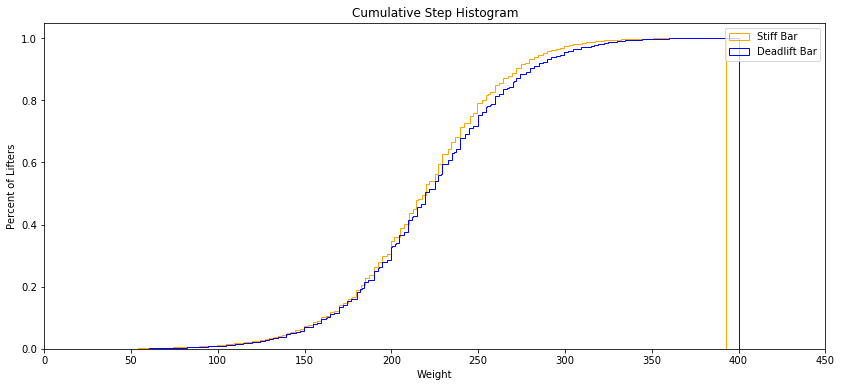

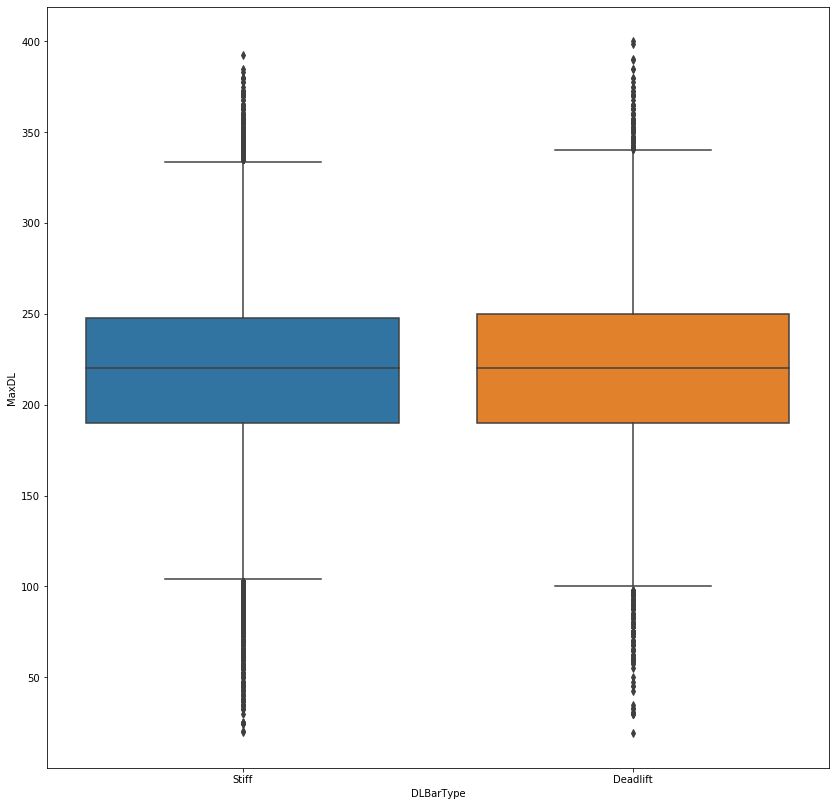

In [6]:

plt.figure(figsize=(14,6))
plt.hist(data.loc[data['DLBarType'] == 'Stiff','MaxDL'], bins=500, histtype='step', normed=1, cumulative=True, color='orange', label='Stiff Bar')
plt.hist(data.loc[data['DLBarType'] == 'Deadlift','MaxDL'], bins=500, histtype='step', normed=1, cumulative=True, color='blue', label='Deadlift Bar')
plt.xlim(0, 450)
plt.legend(loc='left')
plt.title('Cumulative Step Histogram')
plt.ylabel('Percent of Lifters')
plt.xlabel('Weight')
plt.show()

plt.figure(figsize=(14,14))
ax = sns.boxplot(x='DLBarType', y='MaxDL', data=data.loc[data['DLBarType'] != ''])
plt.show()


In [7]:
from scipy import stats

stats.ks_2samp(data.loc[data['DLBarType'] == 'Stiff','MaxDL'], data.loc[data['DLBarType'] == 'Deadlift','MaxDL'])

Ks_2sampResult(statistic=0.16753624712800386, pvalue=0.0)

In [8]:
#outlier removal  

stiffBarPulls = data.loc[(data['DLBarType'] == 'Stiff') & (data['MaxDL'] >= 0),'MaxDL']
stiffBarPullsnoOutliers = stiffBarPulls[stiffBarPulls.between(stiffBarPulls.quantile(.15), stiffBarPulls.quantile(.85))]

DLBarPulls = data.loc[(data['DLBarType'] == 'Deadlift') & (data['MaxDL'] >= 0),'MaxDL']
DLBarPullsnoOutliers = DLBarPulls[DLBarPulls.between(DLBarPulls.quantile(.15), DLBarPulls.quantile(.85))]
# DLBarPullsnoOutliers = DLBarPulls[DLBarPulls.between(DLBarPulls.quantile(.10), DLBarPulls.quantile(.90))]

# np.max(DLBarPullsnoOutliers)


<Figure size 432x288 with 0 Axes>

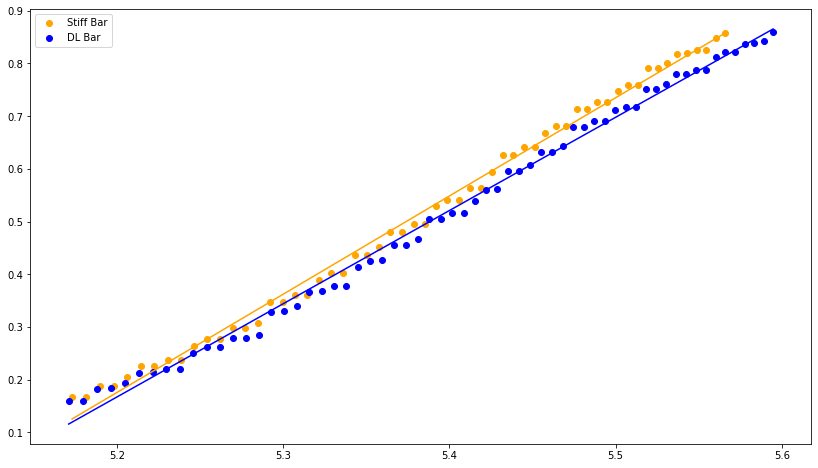

In [9]:
yStiff, xStiff, axStiff = plt.hist(stiffBarPulls, bins=250, histtype='step', normed=1, cumulative=True, color='orange', label='Stiff Bar')
yDL, xDL, axDL = plt.hist(DLBarPulls, bins=250, histtype='step', normed=1, cumulative=True, color='blue', label='Deadlift Bar')

plt.clf()

stiffValueMask = np.argwhere((xStiff>np.min(stiffBarPullsnoOutliers)) & (xStiff<np.max(stiffBarPullsnoOutliers)))
DLValueMask = np.argwhere((xDL>np.min(DLBarPullsnoOutliers)) & (xDL<np.max(DLBarPullsnoOutliers)))

xStiff = xStiff[stiffValueMask]
yStiff = yStiff[stiffValueMask]
xDL = xDL[DLValueMask]
yDL = yDL[DLValueMask]
xStiff = np.squeeze(xStiff)
yStiff = np.squeeze(yStiff)
xDL = np.squeeze(xDL)
yDL = np.squeeze(yDL)

logxStiff = np.log(xStiff)
logyStiff = np.log(yStiff)
logxDL = np.log(xDL)
logyDL = np.log(yDL)

mStiff, bStiff = np.polyfit(logxStiff, yStiff, 1)
mDL, bDL = np.polyfit(logxDL, yDL, 1)

plt.figure(figsize=(14, 8))
plt.scatter(logxStiff, yStiff, label='Stiff Bar', color='orange')
plt.plot(logxStiff, mStiff*logxStiff+bStiff, color='orange')
plt.scatter(logxDL, yDL, label='DL Bar', color='blue')
plt.plot(logxDL, mDL*logxDL+bDL, color='blue')

plt.legend(loc='left')
plt.show()



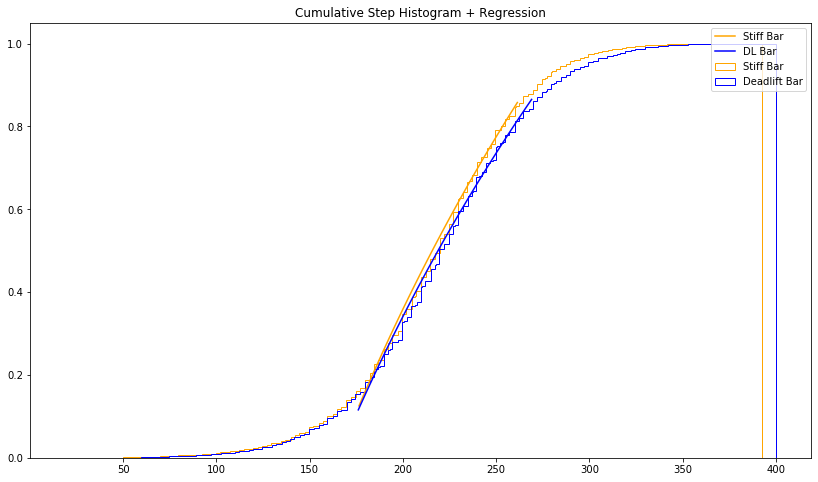

In [10]:
plt.figure(figsize=(14, 8))
# plt.scatter(logxStiff, yStiff, label='Stiff Bar', color='orange')
plt.plot(np.exp(logxStiff), mStiff*logxStiff+bStiff, color='orange', label='Stiff Bar')
# plt.scatter(logxDL, yDL, label='DL Bar', color='blue')
plt.plot(np.exp(logxDL), mDL*logxDL+bDL, color='blue', label='DL Bar')
plt.hist(data.loc[data['DLBarType'] == 'Stiff','MaxDL'], bins=500, histtype='step', normed=1, cumulative=True, color='orange', label='Stiff Bar')
plt.hist(data.loc[data['DLBarType'] == 'Deadlift','MaxDL'], bins=500, histtype='step', normed=1, cumulative=True, color='blue', label='Deadlift Bar')
plt.title('Cumulative Step Histogram + Regression')


plt.legend(loc='left')
plt.show()



In [11]:
def convertDeadlift(deadlift, stiffInput=True):
    if (stiffInput):
        percentile = mStiff*np.log(deadlift)+bStiff
        # print(percentile, "% Percentile")
        return(np.exp((percentile-bDL)/mDL))
    else:
        percentile = mDL*np.log(deadlift)+bDL
        # print(percentile, "% Percentile")
        return(np.exp((percentile-bStiff)/mStiff))


print(convertDeadlift(250, stiffInput=True))

# find equilibrium of model
deadlift = np.exp((bStiff-bDL)/(mDL-mStiff))
print(deadlift)


255.59759111403346
165.74359117882778


In [12]:
np.arange(165, 405, 10)

sample = pd.DataFrame(np.arange(170, 405, 10), columns=['Stiff Bar Weight'])

for i in range(0,int(len(sample))):
    sample.loc[i, 'Projected Deadlift Bar Weight'] = convertDeadlift(sample.loc[i,'Stiff Bar Weight'], stiffInput=True)

file_dir = os.path.join(os.getcwd(), 'sample.csv')
sample.to_csv(file_dir, index=False)